<center><h1>BUSS6002 - Data Science in Business</h1></center>

#### Pre-Tutorial Checklist

1. Complete Tasks 1 and 2 from Week 2
2. Attempt Week 3 tutorial up to but not including Exercise 1
3. Understand the behaviour of isnull() and sum()


# Tutorial 3 - Data Handling, Sorting, Querying and Visualisation

#### Reminder: Classes, methods, and finding the documentation

Recall from week 1 that Objects in Python belong to Classes, and are containers with attributes and methods. When we type 'marketing.head()' we are using the [.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) method (or function) which belongs to the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) Class.

The best way to find more information about a certain class or method is to type the query "module.Class.method", including the inverted commas, into a search engine. The inverted commas force most search engines to only look at exact matches for the string.

If we wanted to find out more about the query() method we could type '"pandas.DataFrame.query"'.

Another way to access documentation is directly through python by typing "module.Class?" or "Class.method?" directly into Jupyter.


## Start

Start by importing ``pandas`` and loading our marketing dataset

In [1]:
import pandas as pd

marketing = pd.read_csv('DirectMarketing.csv')

# Remember this dataset?
marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


### Handling Missing or Corrupt Data

We can check if there is missing or corrupt cells in our Dataframe using the following code. This tells us how many missing values there are in each column.

In [2]:
# isnull() finds out if the value is Not a Number (NaN) and returns True if NaN and False otherwise
# sum() counts all the times that True appears in the dataframe (True = 1, False = 0)
marketing.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

Now we can remove any rows containing the missing values using ``dropna()``.

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - DataFrame.dropna</h3></div>
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html

In [3]:
# dropna() removes NaN values
marketing_clean = marketing.dropna()

Lets check that the bad rows have been removed:

In [4]:
marketing_clean.isnull().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    0
dtype: int64

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - DataFrame.isnull</h3></div>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - DataFrame.sum</h3></div>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html

<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise 1 - True or False</h3></div>

1. Missing values can only be removed if the propensity for values to be missing is independent of the missing value and other features. Removing non-random missing values can bias the dataset.

2. Missing values should be removed because they are counted as 0 in Python and therefore bias the dataset

## Querying

One of the most powerful features of Pandas is the ability to query the data. Querying allows us to extract data that matches criteria.

There are two ways to query a dataframe:
- .query()
- index notation

### Query Function

The query function requires a query expression string. You can write it like a maths expression.

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - DataFrame.query</h3></div>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html

Let's find all rows in our data frame with Salary greater than \$90,000.

In [5]:
big_earners = marketing.query("Salary > 90000")

big_earners.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
11,Middle,Male,Own,Married,Far,111800,3,High,18,2065
13,Middle,Male,Own,Married,Close,111400,0,High,12,2136
14,Old,Female,Own,Married,Far,110000,0,High,24,5564
17,Middle,Male,Own,Married,Close,90100,0,High,18,1956
25,Middle,Female,Own,Married,Close,92300,3,Low,18,655


We can also refer to variables in our environment by prefixing them with @, e.g.

In [6]:
x = 1500

big_spenders = marketing.query("AmountSpent > @x")

big_spenders.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
9,Old,Male,Own,Married,Far,80700,0,NaN,18,3034
11,Middle,Male,Own,Married,Far,111800,3,High,18,2065
13,Middle,Male,Own,Married,Close,111400,0,High,12,2136
14,Old,Female,Own,Married,Far,110000,0,High,24,5564


### Index Query Style

Instead of writing a query expression string, you can find evaluate a query against a column, then use this as an index list into the dataframe.

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - Boolean Index notation</h3></div>
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

The example below is equivalent to the query function from above

In [7]:
big_spenders = marketing[marketing['AmountSpent'] > 1500]

big_spenders.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
9,Old,Male,Own,Married,Far,80700,0,NaN,18,3034
11,Middle,Male,Own,Married,Far,111800,3,High,18,2065
13,Middle,Male,Own,Married,Close,111400,0,High,12,2136
14,Old,Female,Own,Married,Far,110000,0,High,24,5564


### Multiple Criteria

You can join multiple queries together by using AND (both criteria must be true) or OR (one of the criteria must be true) joins. These are represented by the operators ``&`` and ``|`` respectively.

For example let's find big spenders with relatively low incomes.

In [8]:
addicts = marketing[(marketing['Salary'] <= 50000) & (marketing['AmountSpent'] > 2000)]

addicts.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
126,Middle,Female,Own,Married,Far,44200,0,High,24,2524
805,Middle,Male,Own,Single,Far,49700,0,High,24,2844


<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise 2 - Formulating queries</h3></div>

How many entries in the marketing DataFrame have a salary over 90000 OR own a home? Use either .query() or the boolean indexing method

*Hint: find the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) on boolean indexing*

## Histograms - Visualising Distributions

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">pyplot.hist</h3></div>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

A histogram allows us to visualise how values of a variable are distributed. Let's create a simple histogram of a variable from the direct marketing dataset.

The variable of interest is the AmountSpent of each person.

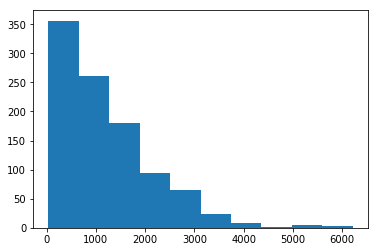

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

amount_spent = marketing['AmountSpent']

plt.hist(amount_spent)

plt.show()

## Box Plots - Compact Histograms

Histograms are great tools, but often we would prefer a more compact visualisation, especially when comparing multiple variables. The box plot perfectly fits our requirements.

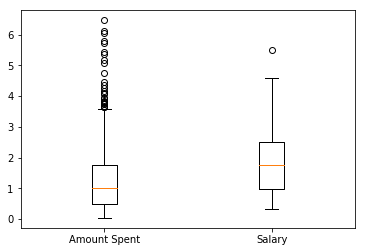

In [10]:
# Standardise (without mean centering) the variables
columns = marketing[['AmountSpent', 'Salary']]
std_columns = marketing[['AmountSpent', 'Salary']] / columns.std()

# Create the box plot
plt.boxplot(std_columns.transpose())

# Label the xticks
plt.xticks([1, 2], ["Amount Spent", "Salary"])

plt.show()

## Creating Columns

You can insert your own data into a dataframe.

Let's look at a simple example of creating a hybrid column of data from our marketing dataset.

I am interested to know the salary/amountspent ratio for each customer. So first let's create a series with the ratio.

In [11]:
ratio = marketing['Salary'] / marketing['AmountSpent']

Then insert this series into the marketing dataframe

In [12]:
marketing['SalarySpendRatio'] = ratio

marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,SalarySpendRatio
0,Old,Female,Own,Single,Far,47500,0,High,6,755,62.913907
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,48.254932
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,45.608108
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,35.139573
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,52.453988


<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise 3 - Understanding Custom Columns</h3></div>

The following code generates a plot. Answer the following:
1. What does it show?
2. What changes would you make to so that the plot is easier to understand?

*Hint: Play with the code to find out what each line does*

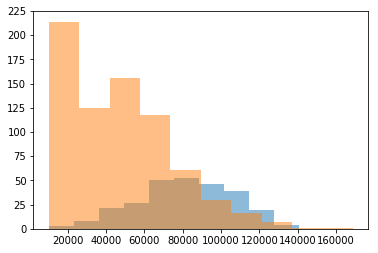

In [13]:
import matplotlib.pyplot as plt

marketing['Family'] = (marketing['Married'] == 'Married') & (marketing['Children'] >= 1)

plt.hist(marketing[marketing['Family'] == True]['Salary'], alpha = 0.5)
plt.hist(marketing[marketing['Family'] == False]['Salary'], alpha = 0.5)

plt.show()

# Sorting

We use sorting when we would like to change the order of our datasets. Our dataset may come in random order. Often, you could like to order the dataset based on a particular attribute.

You need to use the ``sort_values`` function and specify the column and order.

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - DataFrame.sort_values</h3></div>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

Let's sort our dataframe by the "AmountSpent" column in descending order.

We will order the data based on 'AmountSpent' from highest to lowest. Instead of using the default behaviour, we can use optional keywords (see the documentation above) to change the behaviour of our function (here, we change 'ascending' from True to False).

*Remember*, axis=0 refer to the rows and axis=1 refer to the columns

In [14]:
marketing_sorted = marketing.sort_values('AmountSpent', axis=0, ascending=False)
marketing_sorted.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,SalarySpendRatio,Family
987,Old,Male,Own,Married,Far,112900,0,High,24,6217,18.159884,False
496,Middle,Male,Own,Married,Far,123000,1,High,24,5878,20.925485,True
216,Middle,Female,Rent,Married,Far,120800,1,High,24,5830,20.720412,True
14,Old,Female,Own,Married,Far,110000,0,High,24,5564,19.769950,False
993,Middle,Female,Own,Married,Far,99200,0,High,24,5503,18.026531,False


# Counting

This part is about counting the unique (different) types of values in an attribute. We are basically trying to answer the following questions written in the comments.

In [15]:
# How many uniquely different values are there for Age?
marketing['Age'].nunique()

3

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - DataFrame.nunique</h3></div>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [16]:
# What are these uniquely different values in Age?
marketing['Age'].value_counts()

Middle    508
Young     287
Old       205
Name: Age, dtype: int64

Notice that this actually gives us a pandas series object. We can check this using the ``type`` function:

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - type</h3></div>
https://docs.python.org/2/library/functions.html#type

In [17]:
type(marketing['Age'].value_counts())

pandas.core.series.Series

As with all series objects, we have indices on the left column, and the actual values on the right column
Notice that the indices are not actually in order!

So, this time we can also practice sorting by index (one occasion where sorting by index is useful)

In [18]:
marketing['Age'].value_counts().sort_index()

Middle    508
Old       205
Young     287
Name: Age, dtype: int64

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - Series.value_counts</h3></div>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="img/docs.png"> <h3 style="padding-top: 0px;">Documentation - Series.sort_index</h3></div>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_index.html

*Note:* The ``sort_index`` method acts on both Series and DataFrame objects. Replace "Series" with "DataFrame" in the above URL to see the differences.

<div style="margin-bottom: 30px;"><img width=48 style="display: block; float: left;  margin-right: 20px;" src="img/question-mark-button.png"> <h3 style="padding-top: 15px;">Exercise 4 - Counting and Sorting</h3></div>

How many History groups are in this dataset? Which age group is most represented?